### **Teste para Projeto Interdisciplinar 2022.2** (IFSP, Campinas) <br/>


<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>. <br/><br/>

<span style='font-size: 2.5em'><b>Análise TSE 2022</b></span><br/>
<span style='font-size: 1.5em'>Avaliar dados de votação do TSE - Eleição 2022 1º turno - Sprint 1</span>



---


In [3]:
#### Custom CSS style

In [4]:
%%html
<style>
.dashed-box {
    border: 1px dashed black !important;
#    font-size: var(--jp-content-font-size1) !important;
}

.dashed-box table {

}

.dashed-box tr {
    background-color: white !important;
}
        
.alt-tab {
    background-color: black;
    color: #ffc351;
    padding: 4px;
    font-size: 1em;
    font-weight: bold;
    font-family: monospace;
}
// add your CSS styling here
</style>

### 🧠 Challenge


#### 🎯 **Objective:**
**Build a machine learning solution to automatically predict TSE 2022 election results in the Bovespa.** <br/>

#### **Solution Planning:**
- **Regression problem**
- Metrics:
    - R²
    - Root Mean Squared Error (RMSE)
- Data sources:
    - [TSE 2022 resultados](https://github.com/ageron/handson-ml2/blob/master/datasets/housing/README.md)
- No assumptions
- Project deliverable:
    - A simple exploratory data analysis
    - **A ML system/model** launched in _production_ <br/><br/>

## 🎯 Sprint Goals
- Frame the problem
- Get the data
- Data cleaning
- Simple EDA to gain insights
- Initial data preprocessing
- Train a (single) ML algorithm with all features and default hyperparameters
---

### 0. Imports

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### 1. Load the Data

In [1]:
# add code to run on Colab 
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [57]:
tse_2022 = pd.read_csv('gdrive/My Drive/IFSP-CMP-D2APR-2022.2/ProjInter_20022.2/datasets TSE/votacao_candidato_munzona_2022_BRASIL_pre_merge7.csv')

In [7]:
tse_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16679 entries, 0 to 16678
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CD_CARGO               16679 non-null  int64  
 1   DS_CARGO_x             16679 non-null  object 
 2   SQ_CANDIDATO           16679 non-null  int64  
 3   NR_IDADE_DATA_POSSE_x  16679 non-null  float64
 4   CD_GENERO              16679 non-null  int64  
 5   DS_GENERO_x            16679 non-null  object 
 6   CD_GRAU_INSTRUCAO      16679 non-null  int64  
 7   DS_GRAU_INSTRUCAO_x    16679 non-null  object 
 8   CD_ESTADO_CIVIL        16679 non-null  int64  
 9   DS_ESTADO_CIVIL_x      16679 non-null  object 
 10  CD_COR_RACA            16679 non-null  int64  
 11  DS_COR_RACA_x          16679 non-null  object 
 12  CD_OCUPACAO            16679 non-null  int64  
 13  DS_OCUPACAO_x          16679 non-null  object 
 14  ST_REELEICAO_x         16679 non-null  object 
 15  VR

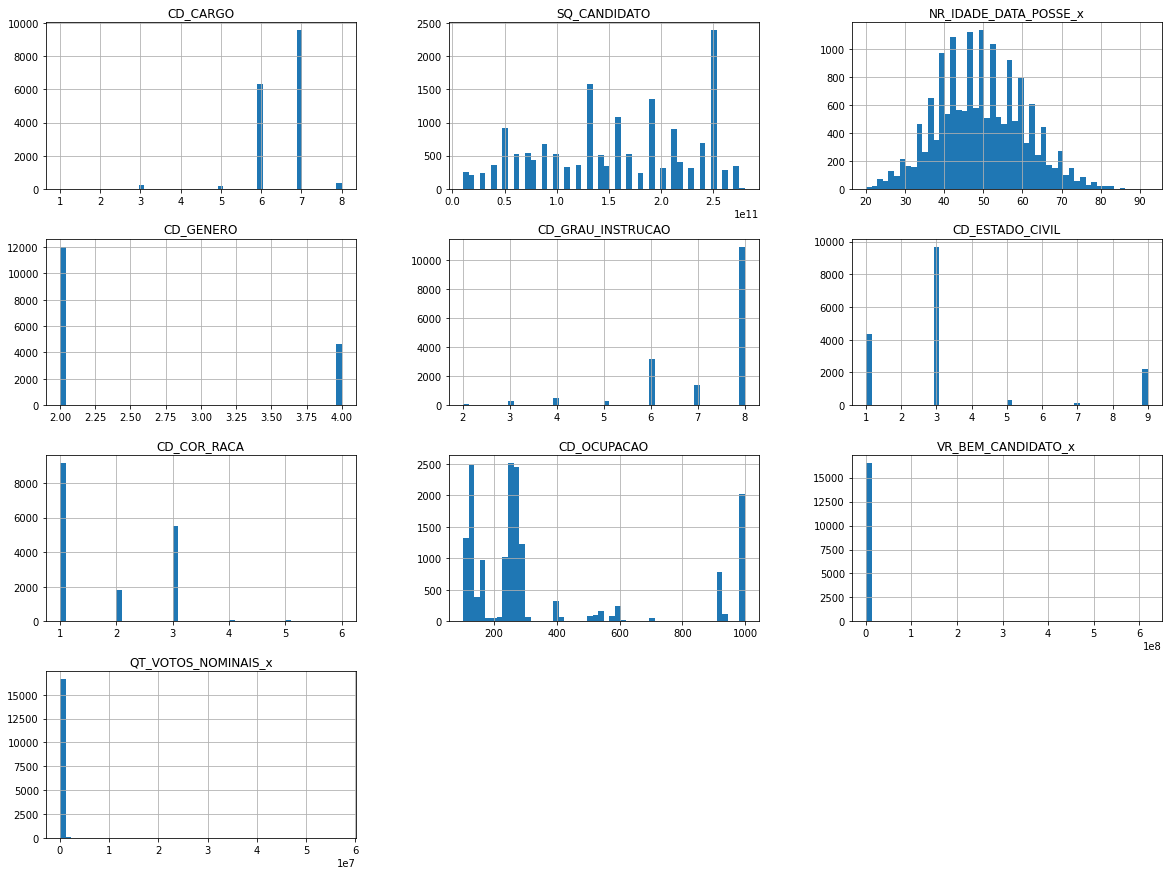

In [8]:
# plot a histogram for each numeric attibute from the dataframe
tse_2022.hist(bins=50, figsize=(20,15))
display()  # just to avoid texts in the notebook output

In [9]:
tse_2022.head()

,CD_CARGO,DS_CARGO_x,SQ_CANDIDATO,NR_IDADE_DATA_POSSE_x,CD_GENERO,DS_GENERO_x,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO_x,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL_x,CD_COR_RACA,DS_COR_RACA_x,CD_OCUPACAO,DS_OCUPACAO_x,ST_REELEICAO_x,VR_BEM_CANDIDATO_x,QT_VOTOS_NOMINAIS_x,NM_URNA_CANDIDATO,DS_SIT_TOT_TURNO
0,6,DEPUTADO FEDERAL,210001596986,45.0,4,FEMININO,8,SUPERIOR COMPLETO,1,SOLTEIRO(A),1,BRANCA,265,PROFESSOR DE ENSINO FUNDAMENTAL,N,199000.00,1064,MALU LOOSE,SUPLENTE
1,6,DEPUTADO FEDERAL,210001620062,63.0,2,MASCULINO,6,ENSINO MEDIO COMPLETO,1,SOLTEIRO(A),1,BRANCA,169,COMERCIANTE,N,323330.75,1269,PEDRO MACARI,SUPLENTE
2,7,DEPUTADO ESTADUAL,210001620186,47.0,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),1,BRANCA,131,ADVOGADO,N,476461.46,11194,ROGERIO GOMES,SUPLENTE
3,7,DEPUTADO ESTADUAL,90001712199,60.0,2,MASCULINO,7,SUPERIOR INCOMPLETO,3,CASADO(A),1,BRANCA,257,EMPRESARIO,N,1217493.90,4891,OZAIR JOSE,SUPLENTE
4,7,DEPUTADO ESTADUAL,140001601525,36.0,4,FEMININO,8,SUPERIOR COMPLETO,1,SOLTEIRO(A),1,BRANCA,101,ENGENHEIRO,N,35500.00,477,KAROL RESENDE,SUPLENTE


In [10]:
tse_2022['DS_SIT_TOT_TURNO'].unique()

array(['SUPLENTE', 'NAO ELEITO', 'ELEITO POR QP', 'ELEITO POR MEDIA',
       '2º TURNO', 'ELEITO'], dtype=object)

In [58]:
# tse_2022['DS_SIT_TOT_TURNO'] = tse_2022['DS_SIT_TOT_TURNO'].map({'ELEITO': 1, 'ELEITO POR QP': 2, 'ELEITO POR MEDIA': 3, 'SUPLENTE': 4, '2º TURNO': 5, 'NAO ELEITO': 6})
tse_2022['DS_SIT_TOT_TURNO'] = tse_2022['DS_SIT_TOT_TURNO'].map({'ELEITO': 1, 'ELEITO POR QP': 1, 'ELEITO POR MEDIA': 1, 'SUPLENTE': 0, '2º TURNO': 0, 'NAO ELEITO': 0})

In [59]:
tse_2022['DS_SIT_TOT_TURNO'].unique()

array([0, 1])

In [60]:
tse_2022['DS_CARGO_x'].unique()

array(['DEPUTADO FEDERAL', 'DEPUTADO ESTADUAL', 'GOVERNADOR', 'SENADOR',
       'DEPUTADO DISTRITAL', 'PRESIDENTE'], dtype=object)

In [ ]:
## removendo colunas desncessárias para esta análise
# tse_2022=tse_2022.drop(columns=['DS_CARGO','SQ_CANDIDATO','NM_URNA_CANDIDATO','NM_MUNICIPIO_NASCIMENTO'])

In [15]:
tse_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16679 entries, 0 to 16678
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CD_CARGO               16679 non-null  int64  
 1   DS_CARGO_x             16679 non-null  object 
 2   SQ_CANDIDATO           16679 non-null  int64  
 3   NR_IDADE_DATA_POSSE_x  16679 non-null  float64
 4   CD_GENERO              16679 non-null  int64  
 5   DS_GENERO_x            16679 non-null  object 
 6   CD_GRAU_INSTRUCAO      16679 non-null  int64  
 7   DS_GRAU_INSTRUCAO_x    16679 non-null  object 
 8   CD_ESTADO_CIVIL        16679 non-null  int64  
 9   DS_ESTADO_CIVIL_x      16679 non-null  object 
 10  CD_COR_RACA            16679 non-null  int64  
 11  DS_COR_RACA_x          16679 non-null  object 
 12  CD_OCUPACAO            16679 non-null  int64  
 13  DS_OCUPACAO_x          16679 non-null  object 
 14  ST_REELEICAO_x         16679 non-null  object 
 15  VR

In [61]:
## removendo linhas desncessárias para esta análise
tse_2022.drop(tse_2022[tse_2022['DS_CARGO_x'] == 'GOVERNADOR'].index, inplace=True)
tse_2022.drop(tse_2022[tse_2022['DS_CARGO_x'] == 'PRESIDENTE'].index, inplace=True)

In [62]:
tse_2022['DS_CARGO_x'].unique()

array(['DEPUTADO FEDERAL', 'DEPUTADO ESTADUAL', 'SENADOR',
       'DEPUTADO DISTRITAL'], dtype=object)

In [20]:
tse_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16457 entries, 0 to 16678
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CD_CARGO               16457 non-null  int64  
 1   DS_CARGO_x             16457 non-null  object 
 2   SQ_CANDIDATO           16457 non-null  int64  
 3   NR_IDADE_DATA_POSSE_x  16457 non-null  float64
 4   CD_GENERO              16457 non-null  int64  
 5   DS_GENERO_x            16457 non-null  object 
 6   CD_GRAU_INSTRUCAO      16457 non-null  int64  
 7   DS_GRAU_INSTRUCAO_x    16457 non-null  object 
 8   CD_ESTADO_CIVIL        16457 non-null  int64  
 9   DS_ESTADO_CIVIL_x      16457 non-null  object 
 10  CD_COR_RACA            16457 non-null  int64  
 11  DS_COR_RACA_x          16457 non-null  object 
 12  CD_OCUPACAO            16457 non-null  int64  
 13  DS_OCUPACAO_x          16457 non-null  object 
 14  ST_REELEICAO_x         16457 non-null  object 
 15  VR

### Stratified Sampling

In [63]:
tse_2022['NR_IDADE_DATA_POSSE_group'] = pd.cut(tse_2022['NR_IDADE_DATA_POSSE_x'], bins=[0, 40, 50, 60, np.inf],
                                        labels=[1, 2, 3, 4], include_lowest=True)

In [64]:
tse_2022.head()

,CD_CARGO,DS_CARGO_x,SQ_CANDIDATO,NR_IDADE_DATA_POSSE_x,CD_GENERO,DS_GENERO_x,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO_x,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL_x,CD_COR_RACA,DS_COR_RACA_x,CD_OCUPACAO,DS_OCUPACAO_x,ST_REELEICAO_x,VR_BEM_CANDIDATO_x,QT_VOTOS_NOMINAIS_x,NM_URNA_CANDIDATO,DS_SIT_TOT_TURNO,NR_IDADE_DATA_POSSE_group
0,6,DEPUTADO FEDERAL,210001596986,45.0,4,FEMININO,8,SUPERIOR COMPLETO,1,SOLTEIRO(A),1,BRANCA,265,PROFESSOR DE ENSINO FUNDAMENTAL,N,199000.00,1064,MALU LOOSE,0,2
1,6,DEPUTADO FEDERAL,210001620062,63.0,2,MASCULINO,6,ENSINO MEDIO COMPLETO,1,SOLTEIRO(A),1,BRANCA,169,COMERCIANTE,N,323330.75,1269,PEDRO MACARI,0,4
2,7,DEPUTADO ESTADUAL,210001620186,47.0,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),1,BRANCA,131,ADVOGADO,N,476461.46,11194,ROGERIO GOMES,0,2
3,7,DEPUTADO ESTADUAL,90001712199,60.0,2,MASCULINO,7,SUPERIOR INCOMPLETO,3,CASADO(A),1,BRANCA,257,EMPRESARIO,N,1217493.90,4891,OZAIR JOSE,0,3
4,7,DEPUTADO ESTADUAL,140001601525,36.0,4,FEMININO,8,SUPERIOR COMPLETO,1,SOLTEIRO(A),1,BRANCA,101,ENGENHEIRO,N,35500.00,477,KAROL RESENDE,0,1


In [29]:
tse_2022['NR_IDADE_DATA_POSSE_group'].value_counts()

2    5511
3    4671
1    3582
4    2693
Name: NR_IDADE_DATA_POSSE_group, dtype: int64

In [30]:
# proportional of the groups in the entire dataset
tse_2022['NR_IDADE_DATA_POSSE_group'].value_counts() / len(tse_2022['NR_IDADE_DATA_POSSE_group'])

2    0.334873
3    0.283831
1    0.217658
4    0.163639
Name: NR_IDADE_DATA_POSSE_group, dtype: float64

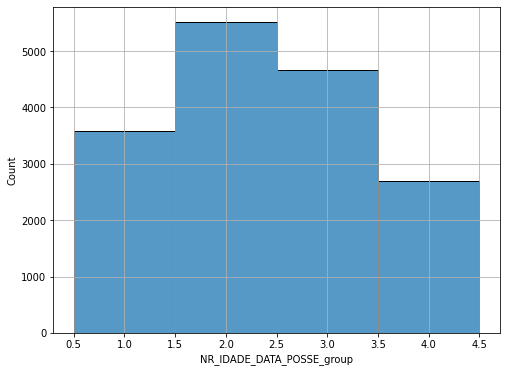

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(tse_2022['NR_IDADE_DATA_POSSE_group'])
plt.grid(True)

#### analisar VR_BEM_CANDIDATO

In [65]:
tse_2022['VR_BEM_CANDIDATO_x'].unique()

array([ 199000.  ,  323330.75,  476461.46, ..., 3970000.  , 2692200.  ,
         17970.  ])

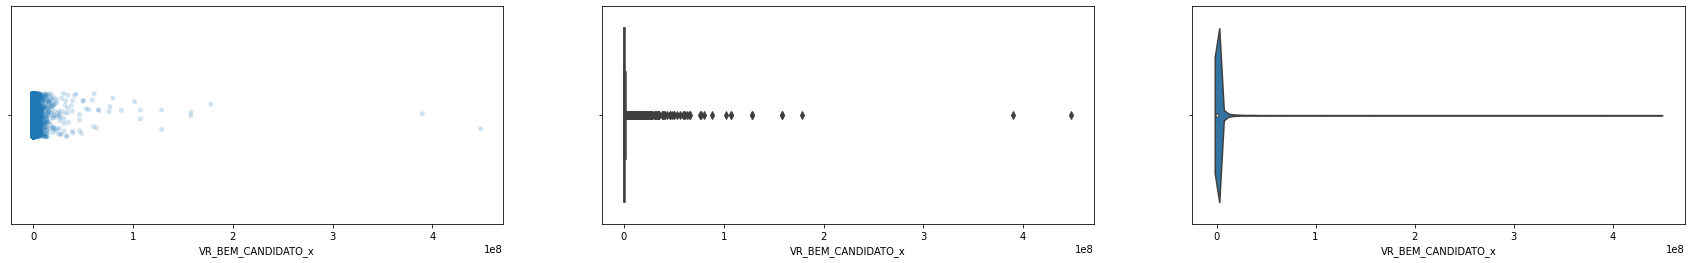

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(30, 4))

sns.stripplot(data=tse_2022, x='VR_BEM_CANDIDATO_x', ax=axes[0], alpha=0.2)
sns.boxplot(data=tse_2022, x='VR_BEM_CANDIDATO_x', ax=axes[1])
sns.violinplot(data=tse_2022, x='VR_BEM_CANDIDATO_x', ax=axes[2])

In [66]:
tse_2022['VR_BEM_CANDIDATO_group'] = pd.cut(tse_2022['VR_BEM_CANDIDATO_x'], bins=[0, 100000, 250000, 500000, np.inf],
                                        labels=[1, 2, 3, 4], include_lowest=True)

In [67]:
tse_2022.head()

,CD_CARGO,DS_CARGO_x,SQ_CANDIDATO,NR_IDADE_DATA_POSSE_x,CD_GENERO,DS_GENERO_x,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO_x,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL_x,...,DS_COR_RACA_x,CD_OCUPACAO,DS_OCUPACAO_x,ST_REELEICAO_x,VR_BEM_CANDIDATO_x,QT_VOTOS_NOMINAIS_x,NM_URNA_CANDIDATO,DS_SIT_TOT_TURNO,NR_IDADE_DATA_POSSE_group,VR_BEM_CANDIDATO_group
0,6,DEPUTADO FEDERAL,210001596986,45.0,4,FEMININO,8,SUPERIOR COMPLETO,1,SOLTEIRO(A),...,BRANCA,265,PROFESSOR DE ENSINO FUNDAMENTAL,N,199000.00,1064,MALU LOOSE,0,2,2
1,6,DEPUTADO FEDERAL,210001620062,63.0,2,MASCULINO,6,ENSINO MEDIO COMPLETO,1,SOLTEIRO(A),...,BRANCA,169,COMERCIANTE,N,323330.75,1269,PEDRO MACARI,0,4,3
2,7,DEPUTADO ESTADUAL,210001620186,47.0,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),...,BRANCA,131,ADVOGADO,N,476461.46,11194,ROGERIO GOMES,0,2,3
3,7,DEPUTADO ESTADUAL,90001712199,60.0,2,MASCULINO,7,SUPERIOR INCOMPLETO,3,CASADO(A),...,BRANCA,257,EMPRESARIO,N,1217493.90,4891,OZAIR JOSE,0,3,4
4,7,DEPUTADO ESTADUAL,140001601525,36.0,4,FEMININO,8,SUPERIOR COMPLETO,1,SOLTEIRO(A),...,BRANCA,101,ENGENHEIRO,N,35500.00,477,KAROL RESENDE,0,1,1


In [37]:
tse_2022['VR_BEM_CANDIDATO_group'].value_counts()

4    5586
1    4879
2    3059
3    2933
Name: VR_BEM_CANDIDATO_group, dtype: int64

In [38]:
# proportional of the groups in the entire dataset
tse_2022['VR_BEM_CANDIDATO_group'].value_counts() / len(tse_2022['VR_BEM_CANDIDATO_group'])

4    0.339430
1    0.296470
2    0.185878
3    0.178222
Name: VR_BEM_CANDIDATO_group, dtype: float64

In [68]:
from sklearn.model_selection import train_test_split

tse_2022_train, tse_2022_test = train_test_split(tse_2022, test_size=0.2, random_state=42, stratify=tse_2022[['NR_IDADE_DATA_POSSE_group','VR_BEM_CANDIDATO_group']])

In [69]:
tse_2022_train.head()

,CD_CARGO,DS_CARGO_x,SQ_CANDIDATO,NR_IDADE_DATA_POSSE_x,CD_GENERO,DS_GENERO_x,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO_x,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL_x,...,DS_COR_RACA_x,CD_OCUPACAO,DS_OCUPACAO_x,ST_REELEICAO_x,VR_BEM_CANDIDATO_x,QT_VOTOS_NOMINAIS_x,NM_URNA_CANDIDATO,DS_SIT_TOT_TURNO,NR_IDADE_DATA_POSSE_group,VR_BEM_CANDIDATO_group
14452,7,DEPUTADO ESTADUAL,250001620658,45.0,2,MASCULINO,8,SUPERIOR COMPLETO,1,SOLTEIRO(A),...,BRANCA,297,SERVIDOR PUBLICO ESTADUAL,N,380095.0,3164,GERALDO RIBEIRO AQUI TEM LUTA,0,2,3
2854,7,DEPUTADO ESTADUAL,250001699839,46.0,2,MASCULINO,6,ENSINO MEDIO COMPLETO,1,SOLTEIRO(A),...,PARDA,923,APOSENTADO (EXCETO SERVIDOR PUBLICO),N,7000.0,264,RANGEL BONELLI,0,2,1
12990,7,DEPUTADO ESTADUAL,250001737624,57.0,4,FEMININO,6,ENSINO MEDIO COMPLETO,1,SOLTEIRO(A),...,PRETA,999,OUTROS,N,750000.0,777,CLAUDIA MACHADO,0,3,4
6356,6,DEPUTADO FEDERAL,130001634132,38.0,2,MASCULINO,5,ENSINO MEDIO INCOMPLETO,1,SOLTEIRO(A),...,PRETA,512,CABELEIREIRO E BARBEIRO,N,250000.0,115,TETA DO SALÃO,0,1,2
9423,6,DEPUTADO FEDERAL,270001700071,36.0,4,FEMININO,8,SUPERIOR COMPLETO,3,CASADO(A),...,PRETA,102,ARQUITETO,N,745000.0,1073,ADRIANA ARQUITETA,0,1,4


In [41]:
tse_2022_train.shape

(13165, 21)

In [70]:
tse_2022_test.head()

,CD_CARGO,DS_CARGO_x,SQ_CANDIDATO,NR_IDADE_DATA_POSSE_x,CD_GENERO,DS_GENERO_x,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO_x,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL_x,...,DS_COR_RACA_x,CD_OCUPACAO,DS_OCUPACAO_x,ST_REELEICAO_x,VR_BEM_CANDIDATO_x,QT_VOTOS_NOMINAIS_x,NM_URNA_CANDIDATO,DS_SIT_TOT_TURNO,NR_IDADE_DATA_POSSE_group,VR_BEM_CANDIDATO_group
3243,7,DEPUTADO ESTADUAL,160001717443,57.0,2,MASCULINO,6,ENSINO MEDIO COMPLETO,1,SOLTEIRO(A),...,BRANCA,297,SERVIDOR PUBLICO ESTADUAL,N,38750.00,1975,MARIANO,0,3,1
8430,7,DEPUTADO ESTADUAL,160001723054,78.0,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),...,BRANCA,131,ADVOGADO,N,1671394.53,858,ZIROCA OSIRES NADAL,0,4,4
16164,7,DEPUTADO ESTADUAL,250001621417,59.0,2,MASCULINO,4,ENSINO FUNDAMENTAL COMPLETO,1,SOLTEIRO(A),...,BRANCA,125,ADMINISTRADOR,N,10000.00,286,EDUARDO CABELEIREIRO,0,3,1
7734,6,DEPUTADO FEDERAL,100001602261,41.0,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),...,PARDA,131,ADVOGADO,S,6527842.31,71999,EDILÁZIO JÚNIOR,0,2,4
770,6,DEPUTADO FEDERAL,50001605373,33.0,2,MASCULINO,8,SUPERIOR COMPLETO,1,SOLTEIRO(A),...,BRANCA,131,ADVOGADO,N,117849.69,29801,XANDÓ,0,1,2


In [43]:
tse_2022_test.shape

(3292, 21)

#### **Saving datasets**

In [71]:
# removing the attribute 'NR_IDADE_DATA_POSSE_group'
tse_2022_train = tse_2022_train.drop(columns=['NR_IDADE_DATA_POSSE_group','VR_BEM_CANDIDATO_group'])
tse_2022_test = tse_2022_test.drop(columns=['NR_IDADE_DATA_POSSE_group','VR_BEM_CANDIDATO_group'])

In [72]:
# removing no numerical attributes
tse_2022_train = tse_2022_train.drop(columns=['DS_CARGO_x','DS_GENERO_x','DS_GRAU_INSTRUCAO_x','DS_ESTADO_CIVIL_x','DS_COR_RACA_x','DS_OCUPACAO_x','NM_URNA_CANDIDATO'])
tse_2022_test = tse_2022_test.drop(columns=['DS_CARGO_x','DS_GENERO_x','DS_GRAU_INSTRUCAO_x','DS_ESTADO_CIVIL_x','DS_COR_RACA_x','DS_OCUPACAO_x','NM_URNA_CANDIDATO'])

In [73]:
tse_2022_train['ST_REELEICAO_x'] = tse_2022_train['ST_REELEICAO_x'].map({'N': 0, 'S': 1})
tse_2022_test['ST_REELEICAO_x'] = tse_2022_test['ST_REELEICAO_x'].map({'N': 0, 'S': 1})

In [74]:
tse_2022_train.head()

,CD_CARGO,SQ_CANDIDATO,NR_IDADE_DATA_POSSE_x,CD_GENERO,CD_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,CD_COR_RACA,CD_OCUPACAO,ST_REELEICAO_x,VR_BEM_CANDIDATO_x,QT_VOTOS_NOMINAIS_x,DS_SIT_TOT_TURNO
14452,7,250001620658,45.0,2,8,1,1,297,0,380095.0,3164,0
2854,7,250001699839,46.0,2,6,1,3,923,0,7000.0,264,0
12990,7,250001737624,57.0,4,6,1,2,999,0,750000.0,777,0
6356,6,130001634132,38.0,2,5,1,2,512,0,250000.0,115,0
9423,6,270001700071,36.0,4,8,3,2,102,0,745000.0,1073,0


In [75]:
tse_2022_test.head()

,CD_CARGO,SQ_CANDIDATO,NR_IDADE_DATA_POSSE_x,CD_GENERO,CD_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,CD_COR_RACA,CD_OCUPACAO,ST_REELEICAO_x,VR_BEM_CANDIDATO_x,QT_VOTOS_NOMINAIS_x,DS_SIT_TOT_TURNO
3243,7,160001717443,57.0,2,6,1,1,297,0,38750.00,1975,0
8430,7,160001723054,78.0,2,8,3,1,131,0,1671394.53,858,0
16164,7,250001621417,59.0,2,4,1,1,125,0,10000.00,286,0
7734,6,100001602261,41.0,2,8,3,3,131,1,6527842.31,71999,0
770,6,50001605373,33.0,2,8,1,1,131,0,117849.69,29801,0


In [76]:
# if you want to keep the reference for the row indices from the original dataset, remove the index=False
tse_2022_train.to_csv('gdrive/My Drive/IFSP-CMP-D2APR-2022.2/ProjInter_20022.2/datasets TSE/tse_2022_train_sprint-3.csv', index=False)
tse_2022_test.to_csv('gdrive/My Drive/IFSP-CMP-D2APR-2022.2/ProjInter_20022.2/datasets TSE/tse_2022_test_sprint-3.csv', index=False)

## 🛠️ 5. Prepare the Data

#### **Separating the independent variables (features) and the _dependent variable_ (target outcome)**

In [ ]:
tse_2022_train_pre = tse_2022_train.drop(columns=['DS_SIT_TOT_TURNO'])
tse_2022_train_target = tse_2022_train['DS_SIT_TOT_TURNO'].copy()

In [ ]:
tse_2022_train_pre.head()

,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,ST_REELEICAO,VR_BEM_CANDIDATO,QT_VOTOS_NOMINAIS
5785,26.0,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),PRETA,ASSISTENTE SOCIAL,N,21000.00,2889
14577,45.0,MASCULINO,ENSINO MÉDIO COMPLETO,DIVORCIADO(A),PARDA,OUTROS,N,30000.00,718
8786,55.0,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,OUTROS,N,526500.00,307
15998,63.0,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,AGRICULTOR,S,903277.51,9061
9179,51.0,MASCULINO,SUPERIOR INCOMPLETO,DIVORCIADO(A),BRANCA,MOTORISTA DE VEÍCULOS DE TRANSPORTE DE CARGA,N,188000.00,1989


In [ ]:
tse_2022_train_target.unique()

array(['SUPLENTE', 'NAO ELEITO', 'ELEITO POR MEDIA', 'ELEITO POR QP',
       'ELEITO', '2º TURNO'], dtype=object)

In [ ]:
tse_2022_train_target = tse_2022_train_target.map({'ELEITO': 1, 'ELEITO POR QP': 2, 'ELEITO POR MEDIA': 3, 'SUPLENTE': 4, '2º TURNO': 5, 'NAO ELEITO': 6})


In [ ]:
tse_2022_train_target.head()

5785     4
14577    4
8786     6
15998    4
9179     6
Name: DS_SIT_TOT_TURNO, dtype: int64

#### **Categorical Variabel Encoding**

In [ ]:
tse_2022_train_pre.columns

Index(['NR_IDADE_DATA_POSSE', 'DS_GENERO', 'DS_GRAU_INSTRUCAO',
       'DS_ESTADO_CIVIL', 'DS_COR_RACA', 'DS_OCUPACAO', 'ST_REELEICAO',
       'VR_BEM_CANDIDATO', 'QT_VOTOS_NOMINAIS'],
      dtype='object')

In [ ]:
# Dummies: boolean variables derived from the categorical variables
dummies_columns = ['DS_GENERO', 'DS_GRAU_INSTRUCAO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA','DS_OCUPACAO','ST_REELEICAO']
tse_2022_train_pre = pd.get_dummies(tse_2022_train_pre, columns=dummies_columns)

In [ ]:
tse_2022_train_pre.head()

,NR_IDADE_DATA_POSSE,VR_BEM_CANDIDATO,QT_VOTOS_NOMINAIS,DS_GENERO_FEMININO,DS_GENERO_MASCULINO,DS_GRAU_INSTRUCAO_ENSINO FUNDAMENTAL COMPLETO,DS_GRAU_INSTRUCAO_ENSINO FUNDAMENTAL INCOMPLETO,DS_GRAU_INSTRUCAO_ENSINO MÉDIO COMPLETO,DS_GRAU_INSTRUCAO_ENSINO MÉDIO INCOMPLETO,DS_GRAU_INSTRUCAO_LÊ E ESCREVE,...,DS_OCUPACAO_TÉCNICO EM INFORMÁTICA,DS_OCUPACAO_TÉCNICO TÊXTIL,DS_OCUPACAO_VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA,DS_OCUPACAO_VENDEDOR PRACISTA. REPRESENTANTE. CAIXEIRO-VIAJANTE E ASSEMELHADOS,DS_OCUPACAO_VEREADOR,DS_OCUPACAO_VETERINÁRIO,DS_OCUPACAO_VIGILANTE,DS_OCUPACAO_ZOOTECNISTA,ST_REELEICAO_N,ST_REELEICAO_S
5785,26.0,21000.00,2889,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14577,45.0,30000.00,718,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
8786,55.0,526500.00,307,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
15998,63.0,903277.51,9061,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9179,51.0,188000.00,1989,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## 🏋️‍♀️ 4. Train ML Algorithms
In this step, we should train _many_ quick-and-dirty models — with _default values_ for their hyperparameters — from different categories. <br/>
We then _measure the performance_ on the **training set** and shortlist the _top three to five_ **most promising models**.

However, we will only select _one model_ in this sprint — **Linear Regression** — for teaching purposes. We will try new ones in later sprints.

<table align="left" class="dashed-box">
<tr>
    <td><span class='alt-tab'>alt-tab</span></td>
    <td>See the definition and concepts about Linear Regresion in the external presentation.</td>
</tr>
</table><br/><br/>

### 4.1. Getting the independent (features) and dependent variables (outcome)
Before training our models, we want to convert the DataFrame and Series for numpy arrays. <br/>
This is not necessarily on this case since the sklearn models can deal with pandas structures.

However, since we will use sklearn transformers in the future, whose outputs will be numpy arrays, let's consider numpy right now.

Just to keep the standard notation of the ML community, let's use **X** for numpy *feature matrix* and **y** for a numpy array of *labels/outcomes*.

In [ ]:
X_train = tse_2022_train_pre.values
y_train = tse_2022_train_target.values

### 4.2. Training the Models

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()  # default hyperparameters

# training
lin_reg.fit(X_train, y_train)

LinearRegression()

### 4.3. Evaluating on the Training Set

### **Prediction**

In [ ]:
y_train_pred = lin_reg.predict(X_train)

### **Metrics**

##### **Coefficient of Determination - R²**
The proportion of _variation_ in the dependent variable (outcome) that is explained by the predictor variables (regression, in this case). <br/>
R² can be interpreted as the percent of variance in our dependent variable that can be explained by our model. <br/>
R² checks how much the regression line fits the data

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y^{(i)}-\hat{y}^{(i)})^2}{\sum_{i=0}^{m-1}(y^{(i)}-\bar{y})^2}$$

##### **Root Mean Squared Error (RMSE)**

$$RMSE = \sqrt{MSE} = \sqrt{\frac{\sum_{i=0}^{m-1}(y^{(i)}-\hat{y}^{(i)})^2}{m}}$$

#### **Evaluation**

In [ ]:
r2_score = lin_reg.score(X_train, y_train)
print(f'R2 = {r2_score}')

R2 = 0.18861578678046376


In [ ]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print(f'RMSE = {rmse}')

RMSE = 1.0581544920047876


This initial result is very bad. Clearly not a great score: a typical **prediction error** of \2145713.8410664913 is not satisfying. <br/>

This is an example of a **model *underfitting*** the training data. When this happens it can mean that the _features_ **do not** provide enough information to make good predictions, or that the model is not powerful enough.

<table align="left" class="dashed-box">
<tr>
    <td><span class='alt-tab'>alt-tab</span></td>
    <td>Slides: Overfitting vs Underfitting.</td>
</tr>
</table><br/><br/>

<table align="left" class="dashed-box">
<tr>
    <td>💡</td>
    <td>The main ways <b>to fix <i>underfitting</i></b> are: <br/>
        - To select a more powerful model;<br/>
        - To feed the training algorithm with better features; or <br/>
        - To reduce the constraints on the model (foregularized models).</td>        
</tr>
</table><br/><br/>

### **Visual Analysis**

##### **Prediction vs Real**

Text(0.5, 1.0, 'QT_VOTOS_NOMINAIS value - Prediction vs Real')

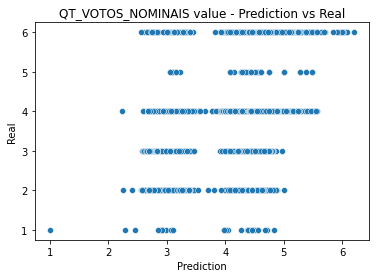

In [ ]:
sns.scatterplot(x=y_train_pred, y=y_train)
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.title('QT_VOTOS_NOMINAIS value - Prediction vs Real')

##### **Residual Analysis**
Plot of Prediction vs Residual. This analysis is interesting because we can detect if we meet the assumption of **homoscedasticity**.

<img src='gdrive/My Drive/IFSP-CMP-D2APR-2022.2/ProjInter_20022.2/imgs/residual-analysis.png' width=600/>

In [ ]:
residual = y_train - y_train_pred

Text(0.5, 1.0, 'QT_VOTOS_NOMINAIS value - Prediction vs Residual')

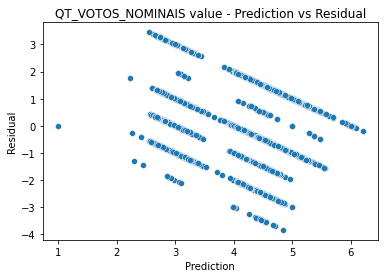

In [ ]:
sns.scatterplot(x=y_train_pred, y=residual)
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.title('QT_VOTOS_NOMINAIS value - Prediction vs Residual')

Our model **does not** meet the **homoscedasticity**. It seems that the residual is correlated to the prediction values (see the trend). <br/>
Also, see strange behavior with the *top diagonal*. It is very likely to be caused by the capped house ages and prices. We need to treat them.

When violating _homoscedasticity_, you may want to do some work on your input data:
- Maybe you have some variables to add or remove;
- Another solution is to do transformations (e.g,. logaritimic or square root transformation).

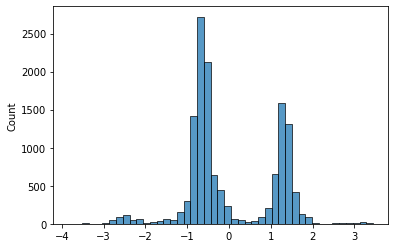

In [ ]:
sns.histplot(residual)

The residual roghly follows a _normal distribution_.

## Some strategies to improve the model
- Adding or remove features
- Cleaning up outliers
- Apply transformations
- Try other models/algorithms (mainly nonlinear)